In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

pm25_path = "/content/drive/MyDrive/seoul_air_emergency_analysis/전처리/pm25_daily_avg_seoul_2020_2021.csv"
pm25_df = pd.read_csv(pm25_path)
er_path = "/content/drive/MyDrive/seoul_air_emergency_analysis/전처리/er_daily_seoul_2020_2021.csv"
er_df = pd.read_csv(er_path)

In [12]:
pm25_df.rename(columns = {'data': 'date'}, inplace = True)
pm25_df['date'] = pd.to_datetime(pm25_df['date'])
er_df.rename(columns = {'year_month' : 'date', 'visit_count' : 'er_count'}, inplace = True)
er_df['date'] = pd.to_datetime(er_df['date'])
er_df.rename(columns = {'year_month' : 'date', 'visit_count' : 'er_count'}, inplace = True)

In [22]:
pm25_df.rename(columns = {'data' : 'date'}, inplace = True)
pm25_df['date'] = pd.to_datetime(pm25_df['date'])
er_df.rename(columns = {'year_month' : 'date', 'visit_count' : 'er_count'}, inplace = True)
er_df['date'] = pd.to_datetime(er_df['date'])

merged_df = pd.merge(pm25_df, er_df, on = 'date', how = 'inner')
merged_df['pm25_rolling'] = merged_df['pm25'].rolling(window = 7, center = True). mean()
merged_df['er_rolling'] = merged_df['er_visits'].rolling(window = 7, center = True). mean()

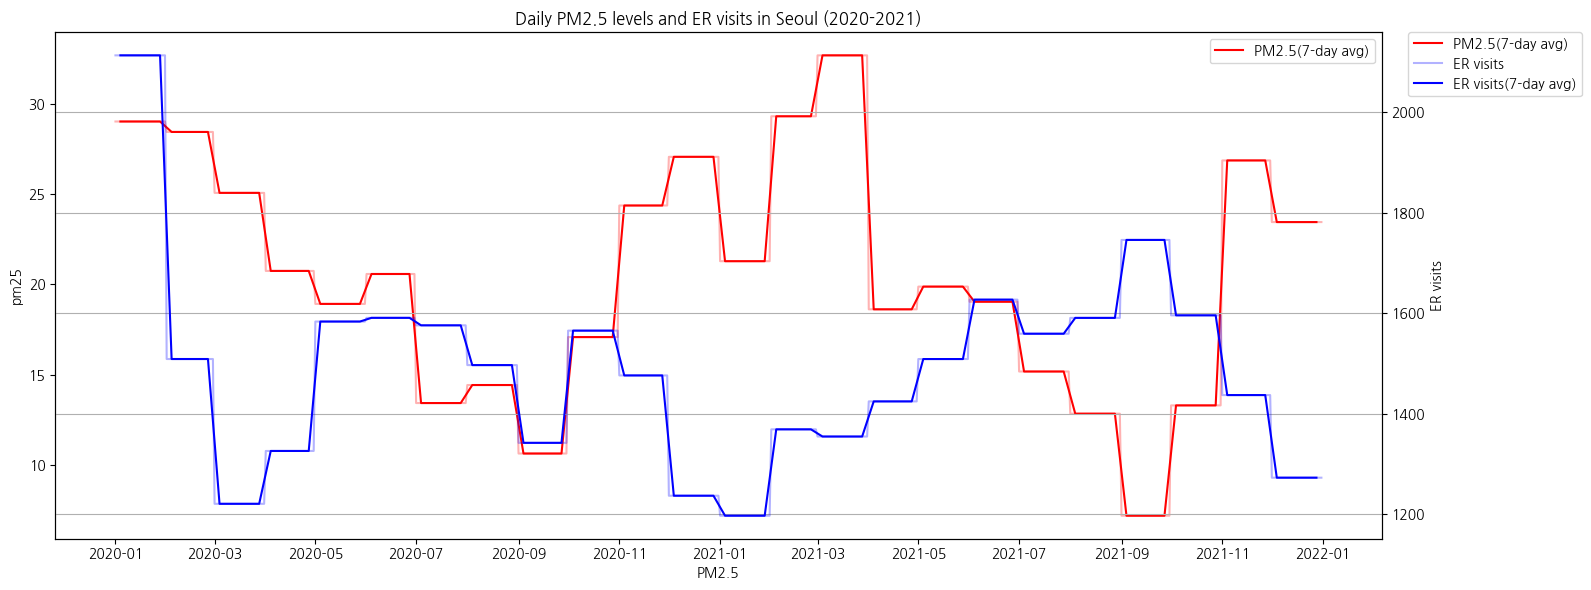

In [39]:
# 시각화
fig, ax1 = plt.subplots(figsize = (16, 6))
sns.lineplot(data = merged_df, x = 'date', y = 'pm25', color = 'red', alpha = 0.3, ax = ax1)
sns.lineplot(data = merged_df, x = 'date', y = 'pm25_rolling', label = 'PM2.5(7-day avg)', color = 'red', ax = ax1)
ax1.set_xlabel('date')
ax1.set_xlabel('PM2.5')
ax1.set_title("Daily PM2.5 levels and ER visits in Seoul (2020-2021)")

ax2 = ax1.twinx()
sns.lineplot(data = merged_df, x = 'date', y = 'er_visits', label = 'ER visits', color = 'blue', alpha = 0.3, ax = ax2)
sns.lineplot(data = merged_df, x = 'date', y = 'er_rolling', label = 'ER visits(7-day avg)', color = 'blue', ax = ax2)
ax2.set_ylabel("ER visits")

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc = 'upper left',
           bbox_to_anchor = (1.02, 1),
           borderaxespad = 0)

plt.tight_layout()
plt.grid(True)